# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

In [1]:
import pandas as pd

I have been using my first churn data to test Auto ML. To read CSV, I've used panda as df.

In [2]:
df = pd.read_csv('churn_data.csv')
df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      7043 non-null   object 
 1   tenure          7043 non-null   int64  
 2   PhoneService    7043 non-null   object 
 3   Contract        7043 non-null   object 
 4   PaymentMethod   7043 non-null   object 
 5   MonthlyCharges  7043 non-null   float64
 6   TotalCharges    7032 non-null   float64
 7   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


First version of the data have not converted yet, lets see how Auto Ml will handle the conversion, missing values and other data cleaning methods. 

#1 Use pycaret to find an ML algorithm that performs best on the data

In [4]:

from pycaret.classification import ClassificationExperiment 


I have used pycaret.classification module, which is used for building and evaluating classification models.

-To initialize ClassificationExperiment:

In [5]:
automl = ClassificationExperiment()

Next I need to set up the experiment with my dataset and specify the target variable as Churn. 

In [6]:
automl.setup(df, target='Churn')

,Description,Value
0,Session id,8864
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 8)"
5,Transformed data shape,"(7043, 13)"
6,Transformed train set shape,"(4930, 13)"
7,Transformed test set shape,"(2113, 13)"
8,Ordinal features,1
9,Numeric features,3


Next step is compare all models and choose the best. 

In [24]:
best_model = automl.compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7712,0.7527,0.7712,0.7581,0.7612,0.3685,0.3740,0.1070
lr,Logistic Regression,0.7361,0.8315,0.7361,0.5774,0.6275,0.0117,0.0237,1.1850
dt,Decision Tree Classifier,0.7347,0.5000,0.7347,0.5398,0.6223,0.0000,0.0000,0.0750
ridge,Ridge Classifier,0.7347,0.0000,0.7347,0.5398,0.6223,0.0000,0.0000,0.0730
rf,Random Forest Classifier,0.7347,0.6413,0.7347,0.5398,0.6223,0.0000,0.0000,0.2100
qda,Quadratic Discriminant Analysis,0.7347,0.5000,0.7347,0.5398,0.6223,0.0000,0.0000,0.0740
ada,Ada Boost Classifier,0.7347,0.5000,0.7347,0.5398,0.6223,0.0000,0.0000,0.0840
gbc,Gradient Boosting Classifier,0.7347,0.5000,0.7347,0.5398,0.6223,0.0000,0.0000,0.1990
lda,Linear Discriminant Analysis,0.7347,0.5000,0.7347,0.5398,0.6223,0.0000,0.0000,0.1000
et,Extra Trees Classifier,0.7347,0.6279,0.7347,0.5398,0.6223,0.0000,0.0000,0.1910


I wanted to choose Recall instead of default beacuse the Recall is suitable when the cost of false negatives (incorrectly predicting a churner as a non-churner) is high. For instance, if missing a potential churner leads to loss of revenue or customer churn, recall should be prioritized.
As a result Accurancy and Recall have same results as 77.12%.

-To see which one is the best for our churn data.

In [25]:
best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

As a result to compared the models. Our best model is the KNeighborsClassifier.

In [13]:
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

The pipeline plot is the first in the row, it means that it's the initial plot shown. This plot provides a visual representation of the entire preprocessing pipeline applied to the data before modeling. It includes steps such as data preprocessing, feature engineering, and any transformations applied to the dataset.

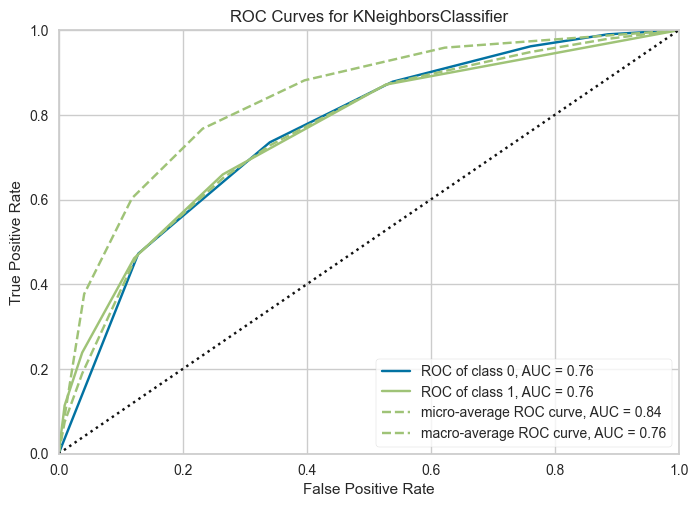

In [14]:
automl.plot_model(best_model)

 If the blue curve (representing the selected model) closely matches the green curves (representing other models), it suggests that all models perform similarly in terms of the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity). In this case, it may be challenging to determine which model is superior based solely on the ROC curve. In my understanding, closer the AUC is to 1, the better the model's ability to distinguish between the positive and negative classes. 

let's try different plot!

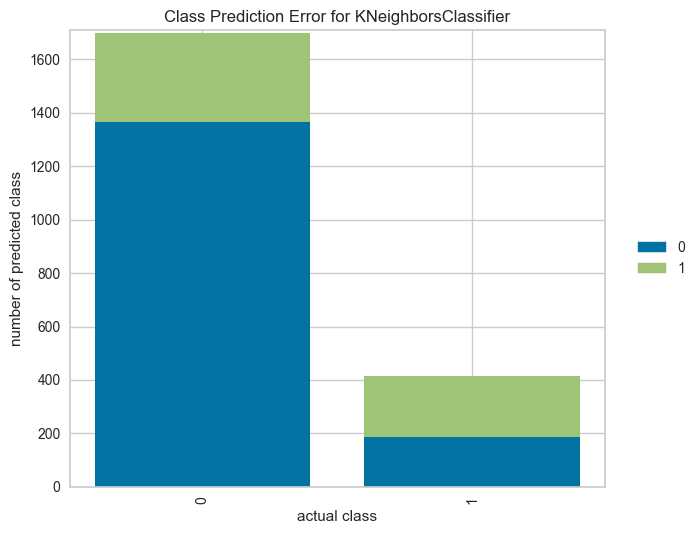

In [32]:
automl.plot_model(best_model, plot = 'error')

If in the Class Prediction Error Plot, the blue bars (predicted classes) are higher than the green bars (actual classes) for a particular class, it indicates that the model is overpredicting that class. In other words, the model is incorrectly assigning more instances to that class than what actually exists in the dataset. We need to consider this in further!

#2 Next step is save the model to the disk

In [41]:
automl.save_model(best_model, 'pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'MonthlyCharges',
                                              'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                                     transformer=TargetEncoder(cols=['customerID'],
                                                               drop_invariant=False,
                                           

#3 Create a Python script/file/module with a function that takes a pandas data frame as an input and returns the probability of churn for each row in the data frame. Test your Python module and function with the new data, new_churn_data.csv

In [76]:
from pycaret.classification import load_model, predict_model

model = load_model('pycaret_model')  
prediction_data = pd.read_csv('new_churn_data.csv')
prediction_data = prediction_data[train_data.columns.drop('Churn')]
predictions = predict_model(model, data=prediction_data)
print("Churn Probabilities for New Data:")
print(predictions['prediction_score'])


Transformation Pipeline and Model Successfully Loaded


Churn Probabilities for New Data:
0    0.8
1    0.6
2    1.0
3    0.8
4    1.0
Name: prediction_score, dtype: float64


I have used the Python model as followed:
1.Load the trained model as pycaret model
2.Load the preprocessed prediction data, loaded new churn data
3.Ensure that the prediction data has the same columns as the training data (excluding the target variable)
4.Make predictions on the new data using the loaded model
5.Printed the churn probabilities for the new data!

As a result: if the prediction score is greater than 5 means churn, lower means unchurn!
Observation 0: True value = 1 (Churn) but 
Model prediction: Churn (Correc t)
Observation 1: True value = 0 (Non-chu but )

Model predictCNon-chIncrn (Cor rect)
Observation 2: True value = 0 (Non- but urn)

Model prediction:Incurn (Incorrect)
Observation 3: True value =  but (Churn)

Model prediction: Churn (Correct)
Observation 4: True value = 0 but Non-churn)

Model prediction: Chu

Observation 1,2 and 4 incorrect means the model misclassified instances where the true outcome was non-churn as churn. I need further exploration on why I had misclassified by auto ML!rn (Incorrect)

# Summary


In this assignment, I used PyCaret, a tool that automates machine learning tasks, to build a model predicting customer churn (whether customers will leave). PyCaret made it super easy to test out different machine learning models to see which one worked best for our data. I compared several classification models using PyCaret's compare_models function and identified the K Neighbors Classifier as the best performer based on Recall. After picking the top-performing model, I saved it so I could use it later whenever we get new customer data. Then, I created a simple function in Python that takes in information about new customers and predicts whether they're likely to churn or not. I tested this function with some pretend customer data and got back predictions for each customer.In general,  PyCaret helped me quickly build a model to predict customer churn, which is super important for keeping our business running smoothlyBut I had a couple of the miscalified results which indicate, I need improvement on the models!
